In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
import datetime
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_example = pd.read_csv("/content/drive/MyDrive/LBBM_2021/Mutation_search/gisaid_hcov-19_2021_08_16_15.tsv",sep='\t') # Se descarga la base de datos del GISAID 
file_example.head()

,Virus name,Accession ID,Collection date,Location,Host,Additional location information,Sampling strategy,Gender,Patient age,Patient status,Last vaccinated,Passage,Specimen,Additional host information,Lineage,Clade,AA Substitutions
0,hCoV-19/USA/MD-MDH-0957/2021,EPI_ISL_1038821,2021-01-28,North America / USA / Maryland / MDH,Human,NaN,NaN,unknown,unknown,unknown,NaN,Original,NaN,NaN,C.37,GR,"(Spike_L249del,Spike_S247del,Spike_G75V,Spike_..."
1,hCoV-19/USA/NY-PRL-2021_02_15_01F08/2021,EPI_ISL_1041597,2021-02-13,North America / USA / New York / New York City,Human,NaN,NaN,Female,69,unknown,NaN,Original,Nasopharyngeal swab,NaN,C.37,GH,"(NSP6_G107del,NSP6_S106del,Spike_E484K,NSP6_F1..."
2,hCoV-19/USA/NY-PRL-2021_02_17_00E09/2021,EPI_ISL_1041794,2021-02-15,North America / USA / New York / New York City,Human,NaN,NaN,Male,8,unknown,NaN,Original,Nasopharyngeal swab,NaN,C.37,GH,"(NS3_P42L,NSP6_G107del,NSP6_S106del,NSP6_F108d..."
3,hCoV-19/USA/NY-PRL-2021_02_17_00F12/2021,EPI_ISL_1041811,2021-02-13,North America / USA / New York / New York City,Human,NaN,NaN,Female,49,unknown,NaN,Original,Nasopharyngeal swab,NaN,C.37,GH,"(NSP6_G107del,NSP6_S106del,NSP6_F108del,NS3_Q5..."
4,hCoV-19/USA/NY-PRL-2021_02_17_00H16/2021,EPI_ISL_1041833,2021-02-12,North America / USA / New York / New York City,Human,NaN,NaN,Female,95,unknown,NaN,Original,Nasopharyngeal swab,NaN,C.37,GH,"(Spike_T95I,N_M234I,NS3_P42L,NSP6_G107del,NSP6..."


In [ ]:
data_1 = file_example.loc[:, ('Virus name', 'Collection date','AA Substitutions')] 
data_1.head()

,Virus name,Collection date,AA Substitutions
0,hCoV-19/USA/MD-MDH-0957/2021,2021-01-28,"(Spike_L249del,Spike_S247del,Spike_G75V,Spike_..."
1,hCoV-19/USA/NY-PRL-2021_02_15_01F08/2021,2021-02-13,"(NSP6_G107del,NSP6_S106del,Spike_E484K,NSP6_F1..."
2,hCoV-19/USA/NY-PRL-2021_02_17_00E09/2021,2021-02-15,"(NS3_P42L,NSP6_G107del,NSP6_S106del,NSP6_F108d..."
3,hCoV-19/USA/NY-PRL-2021_02_17_00F12/2021,2021-02-13,"(NSP6_G107del,NSP6_S106del,NSP6_F108del,NS3_Q5..."
4,hCoV-19/USA/NY-PRL-2021_02_17_00H16/2021,2021-02-12,"(Spike_T95I,N_M234I,NS3_P42L,NSP6_G107del,NSP6..."


In [ ]:
data_2 = data_1.sort_values(by=['Collection date'],ascending=True,ignore_index=True) # fitro de fechas
data_2

,Virus name,Collection date,AA Substitutions
0,hCoV-19/Argentina/INEI096534/2020,2020-11-08,"(Spike_L249del,Spike_S247del,Spike_G75V,Spike_..."
1,hCoV-19/Peru/LIM-INS-869/2020,2020-11-30,"(Spike_M153T,N_G214C,NSP5_G15S,NSP6_G107del,NS..."
2,hCoV-19/Peru/LIM-INS-895/2020,2020-12-22,"(Spike_L249del,Spike_S247del,Spike_G75V,Spike_..."
3,hCoV-19/Peru/LIM-UPCH-0372/2021,2021-01-01,"(Spike_L249del,Spike_S247del,Spike_G75V,Spike_..."
4,hCoV-19/Peru/SAM-INS-2426/2021,2021-01-08,"(Spike_L249del,Spike_S247del,Spike_G75V,Spike_..."
...,...,...,...
4453,hCoV-19/USA/CA-CDC-FG-055921/2021,2021-07-30,"(Spike_L249del,Spike_S247del,Spike_G75V,Spike_..."
4454,hCoV-19/Ecuador/USFQ-1856/2021,2021-07-30,"(N_G214C,N_R203K,NSP2_G339S,NSP3_F1569V,NSP3_T..."
4455,hCoV-19/Ecuador/USFQ-1849/2021,2021-07-30,"(Spike_L249del,Spike_S247del,Spike_G75V,Spike_..."
4456,hCoV-19/USA/VT-CDCBI-CRSP_G3GVF3OP4IUCUWDQ/2021,2021-08-03,"(Spike_L249del,Spike_S247del,Spike_G75V,Spike_..."


In [ ]:
data_2['Collection date'] =  pd.to_datetime(data_2['Collection date'] , infer_datetime_format=True)

In [ ]:
def spike(array_mutations):

  spike_array = []
  
  array_mutations_1 = array_mutations.replace('(', '')
  array = array_mutations_1.replace(')', '')
  for i in array.split(","):
    new_line = i.split("_")
    if new_line[0] == "Spike":
      spike_array.append(new_line[1])

  return spike_array

In [ ]:
def year_fraction(date): # Transformar tiempo en décimal
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

In [ ]:
df_pos = -1

dict_spike_date = {}
dict_spike_binary = {}


for i in data_1["AA Substitutions"]:
  
  df_pos += 1
  dict_spike_date[data_1["Virus name"][df_pos]] = {} 
  spike_list = spike(i)
  dict_spike_binary[data_1["Virus name"][df_pos]] = dict.fromkeys(spike_list,1)
  dict_spike_date[data_1["Virus name"][df_pos]] = dict.fromkeys(spike_list,year_fraction(date.fromisoformat(data_1['Collection date'][df_pos])))

print(len(dict_spike_date))

4456


In [ ]:
#for key, value in dict_spike_date.items():
#  print(key,value)

In [ ]:
pd_mutaciones = pd.DataFrame.from_dict(dict_spike_date).T
pd_mutaciones.head()

,L249del,S247del,G75V,Y248del,F490S,T859N,D253N,R246del,G252del,D614G,T250del,L452Q,P251del,T76I,E484K,L5F,D253G,T95I,T716I,D1118H,P681H,H69del,V70del,N501Y,Y269del,G268del,Y265del,A264del,Y266del,V267del,A263del,A701V,S939F,E1072G,E471Q,I714V,S46L,S477N,S982A,S13I,...,S247I,I1169F,C1253F,V362F,Y313F,N1192H,V1104L,M153L,D808N,T941A,F157S,K1045N,I587V,E868D,L822F,R246I,M740I,Q784L,D1118Y,V143D,S459F,T430I,H66Y,P1112L,G1219S,D88H,S943R,T95A,W64R,D627Y,R21T,A623del,I624del,P792R,N188S,K77N,K113E,M1237V,P174R,L452H
hCoV-19/USA/MD-MDH-0957/2021,2021.073973,2021.073973,2021.073973,2021.073973,2021.073973,2021.073973,2021.073973,2021.073973,2021.073973,2021.073973,2021.073973,2021.073973,2021.073973,2021.073973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hCoV-19/USA/NY-PRL-2021_02_15_01F08/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.117808,NaN,NaN,NaN,NaN,2021.117808,2021.117808,2021.117808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hCoV-19/USA/NY-PRL-2021_02_17_00E09/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.123288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hCoV-19/USA/NY-PRL-2021_02_17_00F12/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.117808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hCoV-19/USA/NY-PRL-2021_02_17_00H16/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.115068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.115068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dic_frequencies = {}

for i  in pd_mutaciones:
  if (len(pd_mutaciones[i]) - sum(pd.isnull(pd_mutaciones[i]))) >= 150 :
    dic_frequencies[i] = len(pd_mutaciones[i]) - sum(pd.isnull(pd_mutaciones[i]))
  #print(len(pd_mutaciones[i]),sum(pd.isnull(pd_mutaciones[i])),i)

print(len(dic_frequencies),dic_frequencies)

16 {'L249del': 3609, 'S247del': 3597, 'G75V': 3992, 'Y248del': 3609, 'F490S': 4207, 'T859N': 4227, 'D253N': 3626, 'R246del': 3595, 'G252del': 3617, 'D614G': 4448, 'T250del': 3614, 'L452Q': 4222, 'P251del': 3615, 'T76I': 3997, 'I714V': 219, 'Q675H': 241}


In [ ]:
pd_frequencies = pd.DataFrame.from_dict(dic_frequencies, orient='index')
pd_frequencies = pd_frequencies.reset_index()

In [ ]:
pd_fechas = pd_mutaciones.min()
pd_fechas = pd_fechas.reset_index()
pd_fechas.head()


,index,0
0,L249del,2020.852459
1,S247del,2020.852459
2,G75V,2020.852459
3,Y248del,2020.852459
4,F490S,2020.852459


In [ ]:
join = pd.merge(pd_fechas, pd_frequencies, on="index" )
join  = join.rename({'index': 'mutations', '0_x': 'date', '0_y': 'Frequency absolute' }, axis=1)
join.head()

,mutations,date,Frequency absolute
0,L249del,2020.852459,3609
1,S247del,2020.852459,3597
2,G75V,2020.852459,3992
3,Y248del,2020.852459,3609
4,F490S,2020.852459,4207


In [ ]:
join.shape

(16, 3)

In [ ]:
join.to_csv("/content/drive/MyDrive/LBBM_2021/Mutation_search/resume_mutations.tsv", sep='\t')



<Figure size 3600x576 with 0 Axes>

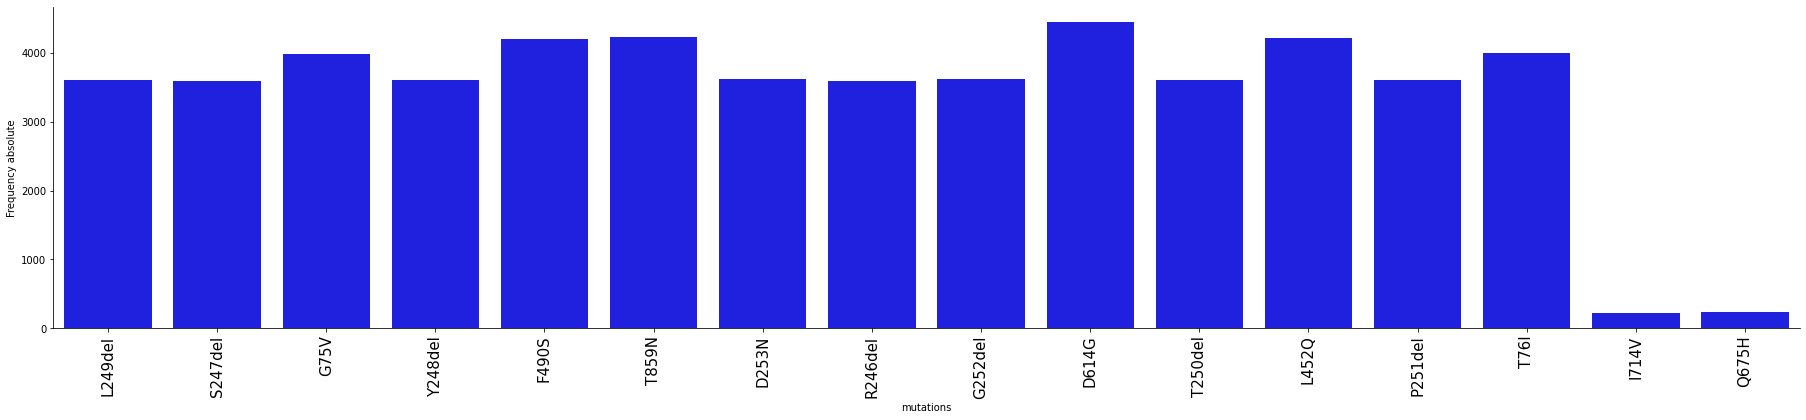

In [ ]:
plt.figure(figsize=(50, 8))
g = sns.catplot(x=join["mutations"] ,y=join["Frequency absolute"] ,data=join,kind='bar',aspect=5, color="blue")
g.set_xticklabels(rotation=90, fontsize=15)

[Text(0, 0, 'L249del'),
 Text(0, 0, 'S247del'),
 Text(0, 0, 'G75V'),
 Text(0, 0, 'Y248del'),
 Text(0, 0, 'F490S'),
 Text(0, 0, 'T859N'),
 Text(0, 0, 'D253N'),
 Text(0, 0, 'R246del'),
 Text(0, 0, 'G252del'),
 Text(0, 0, 'D614G'),
 Text(0, 0, 'T250del'),
 Text(0, 0, 'L452Q'),
 Text(0, 0, 'P251del'),
 Text(0, 0, 'T76I'),
 Text(0, 0, 'I714V'),
 Text(0, 0, 'Q675H')]

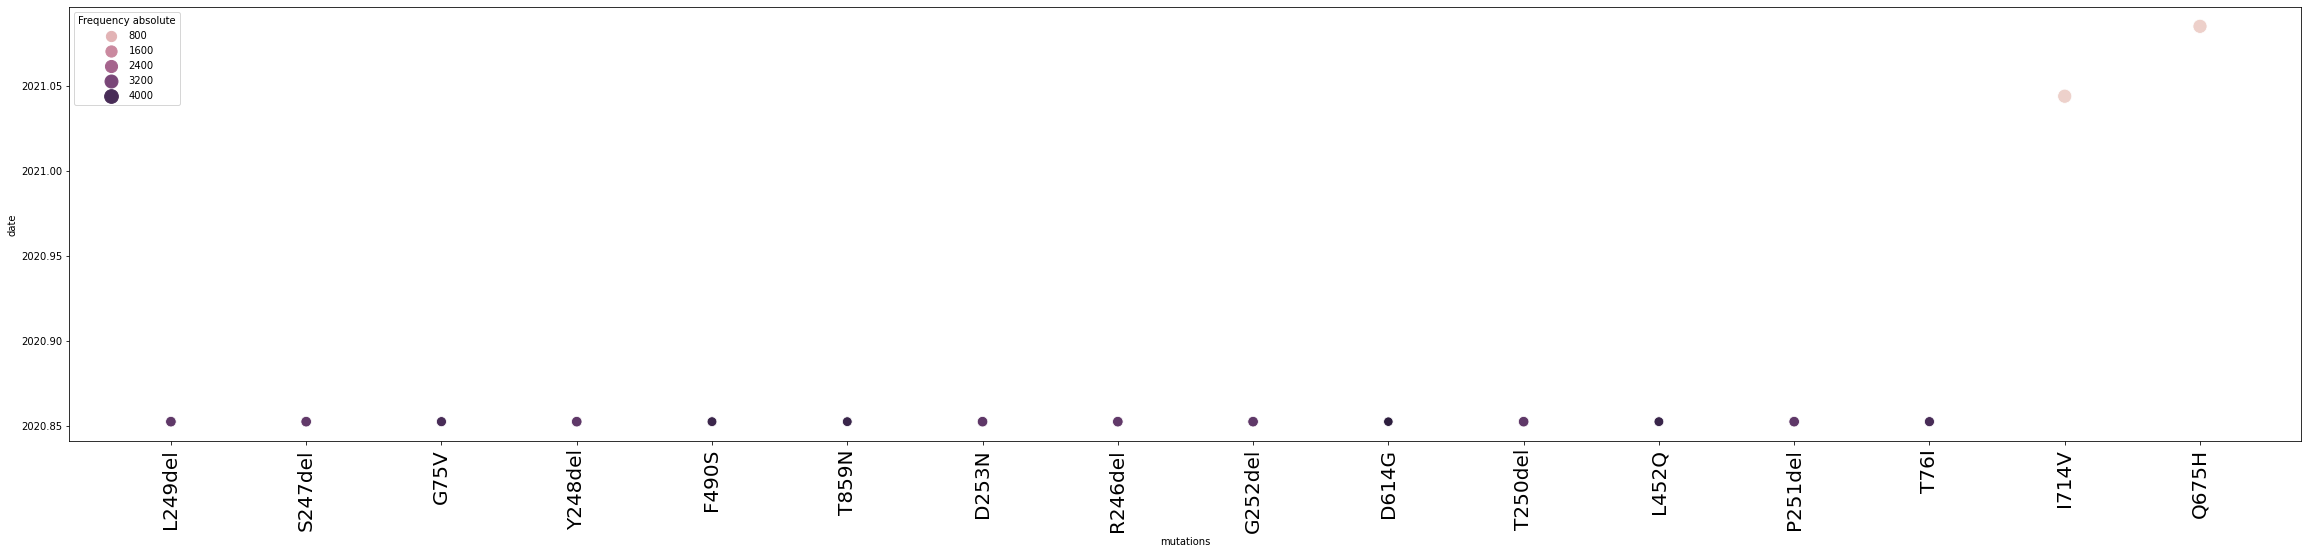

In [ ]:
plt.figure(figsize=(40, 8))
plt.xticks(rotation = 90)
ax = sns.scatterplot(data=join, x="mutations", y="date", hue="Frequency absolute", size="Frequency absolute", sizes=(200, 90))
ax.set_xticklabels(labels=join["mutations"], fontsize=20)

In [ ]:
array_genomes = []

for i in join["mutations"]:
  genomes_early = (pd_mutaciones[pd_mutaciones[i] == pd_mutaciones[i].min()].index)
  lista = list(genomes_early)
  for i in lista:
    array_genomes.append(i)

array_genomes = list(set(array_genomes))

array_genomes

['hCoV-19/Peru/LIM-INS-436/2021',
 'hCoV-19/Peru/LIM-INS-430/2021',
 'hCoV-19/Peru/LIM-INS-434/2021',
 'hCoV-19/Peru/ARE-UPCH-0705/2021',
 'hCoV-19/Argentina/INEI096534/2020',
 'hCoV-19/Peru/LIM-INS-433/2021']

In [ ]:
ancestral_genomes = "\n".join(array_genomes)

f = open("/content/drive/MyDrive/LBBM_2021/Mutation_search/ancestral_genomes.txt", "a")
f.write(ancestral_genomes)
f.close()


In [ ]:
genomes_early = pd_mutaciones.loc[array_genomes]
genomes_early = genomes_early.dropna(axis = 1, how = 'all')
genomes_early.head()

,L249del,S247del,G75V,Y248del,F490S,T859N,D253N,R246del,G252del,D614G,T250del,L452Q,P251del,T76I,I714V,Q675H
hCoV-19/Peru/LIM-INS-436/2021,NaN,NaN,2021.043836,NaN,2021.043836,2021.043836,NaN,NaN,NaN,2021.043836,NaN,2021.043836,NaN,2021.043836,2021.043836,NaN
hCoV-19/Peru/LIM-INS-430/2021,NaN,NaN,2021.043836,NaN,2021.043836,2021.043836,NaN,NaN,NaN,2021.043836,NaN,2021.043836,NaN,2021.043836,2021.043836,NaN
hCoV-19/Peru/LIM-INS-434/2021,NaN,NaN,2021.043836,NaN,2021.043836,2021.043836,NaN,NaN,NaN,2021.043836,NaN,2021.043836,NaN,2021.043836,2021.043836,NaN
hCoV-19/Peru/ARE-UPCH-0705/2021,2021.084932,2021.084932,2021.084932,2021.084932,2021.084932,2021.084932,2021.084932,2021.084932,2021.084932,2021.084932,2021.084932,2021.084932,2021.084932,2021.084932,NaN,2021.084932
hCoV-19/Argentina/INEI096534/2020,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,2020.852459,NaN,NaN


[Text(0.5, 0, 'L249del'),
 Text(1.5, 0, 'S247del'),
 Text(2.5, 0, 'G75V'),
 Text(3.5, 0, 'Y248del'),
 Text(4.5, 0, 'F490S'),
 Text(5.5, 0, 'T859N'),
 Text(6.5, 0, 'D253N'),
 Text(7.5, 0, 'R246del'),
 Text(8.5, 0, 'G252del'),
 Text(9.5, 0, 'D614G'),
 Text(10.5, 0, 'T250del'),
 Text(11.5, 0, 'L452Q'),
 Text(12.5, 0, 'P251del'),
 Text(13.5, 0, 'T76I'),
 Text(14.5, 0, 'I714V'),
 Text(15.5, 0, 'Q675H')]

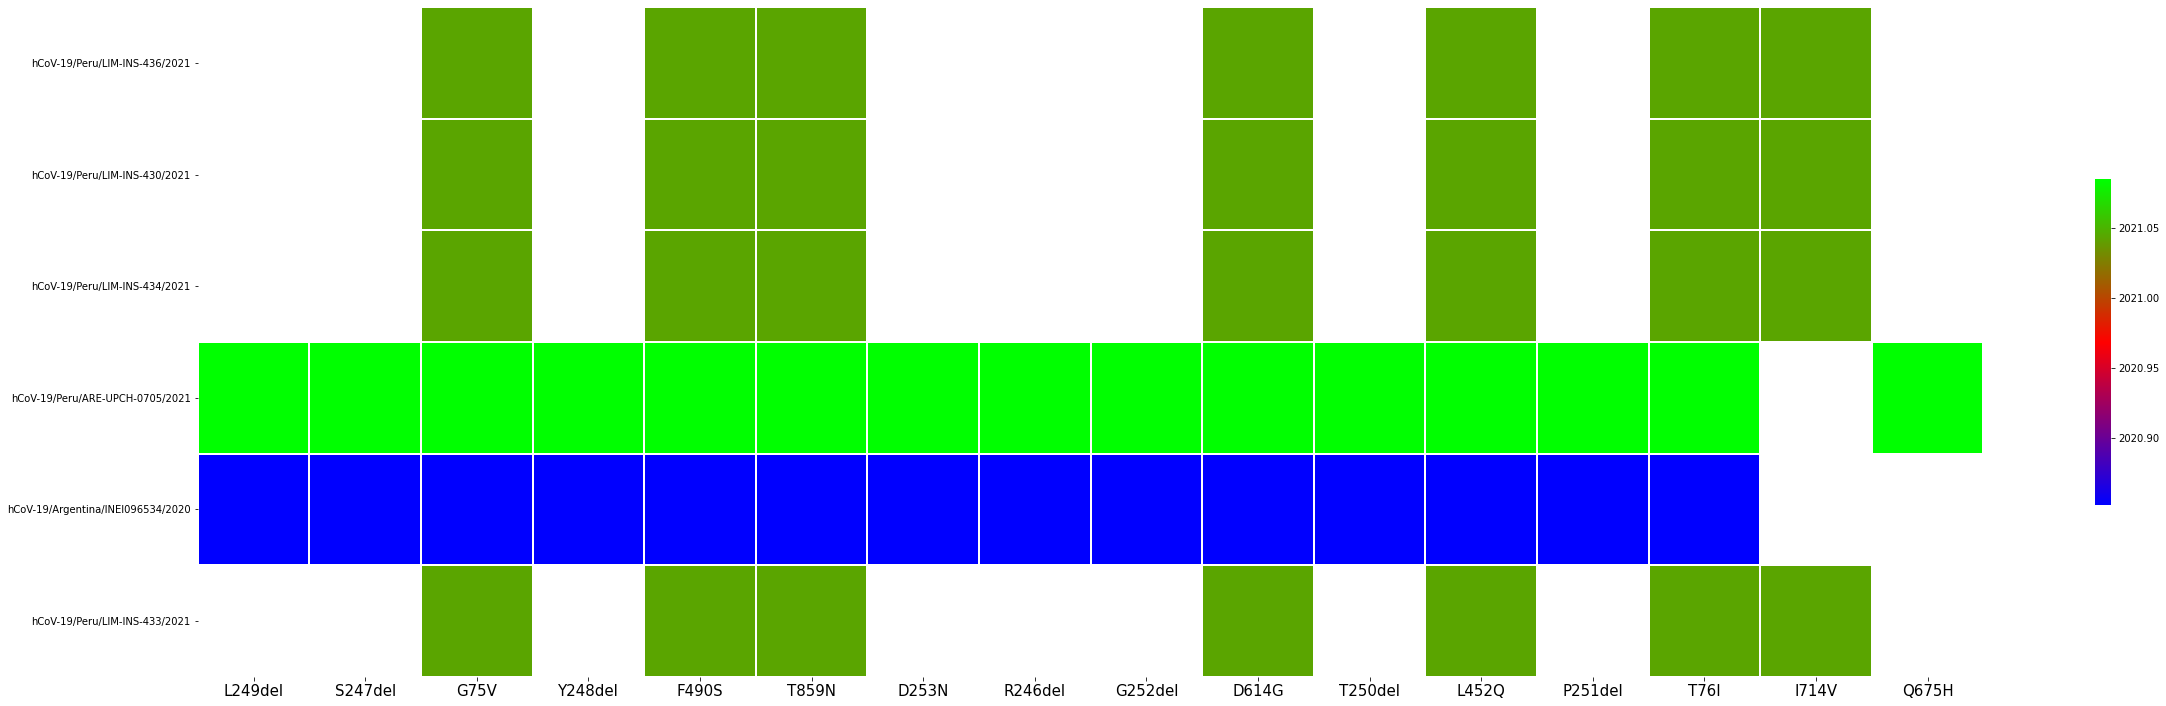

In [ ]:
plt.figure(figsize=(40, 20))
ax = sns.heatmap(genomes_early, cmap="brg", xticklabels=1, linewidths=1, linecolor='white', cbar_kws={"shrink": .30}, square=True)
ax.set_xticklabels(labels=genomes_early, fontsize=15)

In [ ]:
#Esta parte del código no vale.
binary_mutaciones = pd.DataFrame.from_dict(dict_spike_binary).T

list_genes = [] 

for i in join["mutations"]:
  list_genes.append(i)

pd_b01mutations = binary_mutaciones[list_genes].fillna(0)
pd_b01mutations.head()

,L249del,S247del,G75V,Y248del,F490S,T859N,D253N,R246del,G252del,D614G,T250del,L452Q,P251del,T76I,I714V,Q675H
hCoV-19/USA/MD-MDH-0957/2021,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
hCoV-19/USA/NY-PRL-2021_02_15_01F08/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
hCoV-19/USA/NY-PRL-2021_02_17_00E09/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
hCoV-19/USA/NY-PRL-2021_02_17_00F12/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
hCoV-19/USA/NY-PRL-2021_02_17_00H16/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd_b01mutations.to_csv("/content/drive/MyDrive/LBBM_2021/Mutation_search/binary_mutation.tsv", sep='\t')